Generalization with OOP: The MLBacktester Class

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2019-01-01 22:00:00+00:00,1.146580,1.274680,1.626230
2019-01-01 22:05:00+00:00,1.146350,1.274270,1.626170
2019-01-01 22:10:00+00:00,1.146320,1.274760,1.626290
2019-01-01 22:15:00+00:00,1.146320,1.274770,1.626290
2019-01-01 22:20:00+00:00,1.146530,1.274760,1.625620
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,1.335140,1.617190
2020-08-30 23:40:00+00:00,1.191240,1.335250,1.616890
2020-08-30 23:45:00+00:00,1.191515,1.335515,1.616870


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124056 entries, 2019-01-01 22:00:00+00:00 to 2020-08-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EURUSD  123350 non-null  float64
 1   GBPUSD  123169 non-null  float64
 2   EURAUD  123742 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [20]:
import MLBacktester as MLB

EURUSD

In [23]:
symbol = "EURUSD"

In [25]:
ptc = 0.00007

In [66]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", ptc)

In [67]:
ml

MLBacktester(symbol = EURUSD, start = 2019-01-01, end = 2020-08-31, tc = 7e-05)

In [70]:
ml.data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080
2020-08-30 23:40:00+00:00,1.191240,0.000290
2020-08-30 23:45:00+00:00,1.191515,0.000231


In [72]:
ml.test_strategy(train_ratio = 0.7, lags = 5) # Adjust the train ration to change the percentage of data that is used to train

(0.189291, -0.880663)

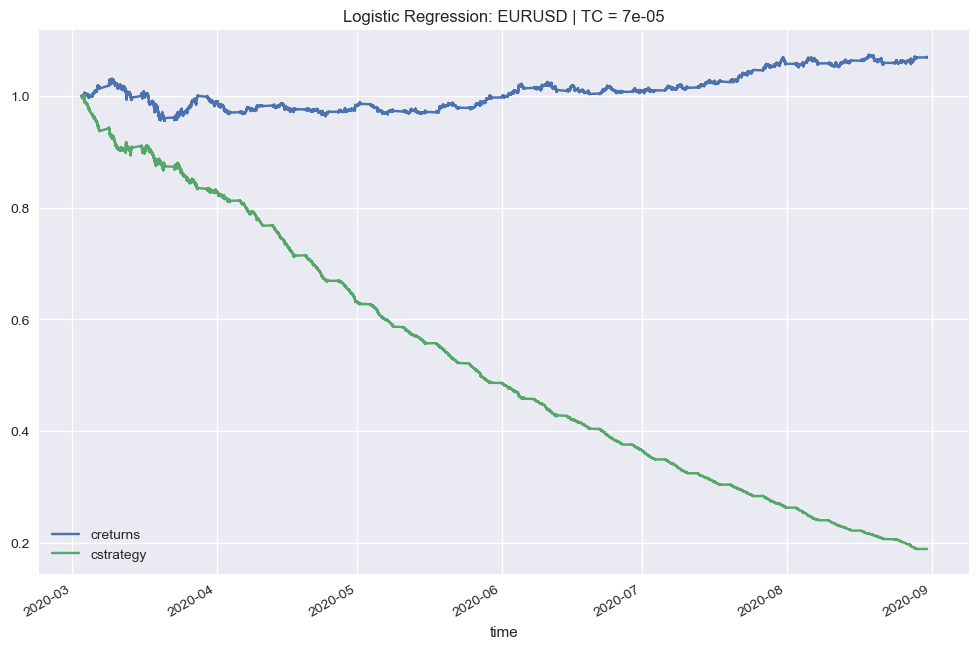

In [74]:
ml.plot_results()

In [76]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,
2020-03-03 00:20:00+00:00,1.113645,-0.000139,-1.044778,-0.680691,-1.340053,0.138070,0.297270,1.0,-0.000139,0.0,0.999861,0.999861
2020-03-03 00:25:00+00:00,1.113745,0.000090,-0.703667,-1.044788,-0.680713,-1.340050,0.138093,1.0,0.000090,0.0,0.999951,0.999951
2020-03-03 00:30:00+00:00,1.113755,0.000009,0.456737,-0.703678,-1.044813,-0.680710,-1.340026,1.0,0.000009,0.0,0.999960,0.999960
2020-03-03 00:35:00+00:00,1.113770,0.000013,0.047174,0.456720,-0.703700,-1.044810,-0.680687,1.0,0.000013,0.0,0.999973,0.999973
2020-03-03 00:40:00+00:00,1.113450,-0.000287,0.069925,0.047160,0.456710,-0.703697,-1.044787,1.0,-0.000287,0.0,0.999686,0.999686
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.466396,1.512378,0.235739,0.001643,-0.764433,1.0,-0.000220,2.0,1.069218,0.189339
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.402603,-0.466408,1.512377,0.235741,0.001666,1.0,0.000290,0.0,1.069528,0.189393
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.469664,-0.402616,-0.466427,1.512380,0.235764,-1.0,-0.000371,2.0,1.069775,0.189323


The Optimal Number of Lags

In [79]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (0.092836, -0.976499)
2 (0.150726, -0.91858)
3 (0.16334, -0.90625)
4 (0.179056, -0.890677)
5 (0.189291, -0.880663)
6 (0.194702, -0.875401)
7 (0.193926, -0.876081)
8 (0.196737, -0.873261)
9 (0.203174, -0.866809)
10 (0.199785, -0.870506)
11 (0.202705, -0.867677)
12 (0.201068, -0.869376)
13 (0.198615, -0.871863)
14 (0.191435, -0.879212)
15 (0.19888, -0.871872)
16 (0.195506, -0.875819)
17 (0.19545, -0.87599)
18 (0.197598, -0.873381)
19 (0.199231, -0.871618)
20 (0.199379, -0.871532)


In [81]:
ml.results.trades.value_counts()

trades
0.0    23263
2.0    13723
Name: count, dtype: int64

EURAUD

In [84]:
symbol = "EURUSD"

In [86]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", 0)

In [88]:
ml.test_strategy(train_ratio = 0.7, lags = 5)

(1.349309, 0.279355)

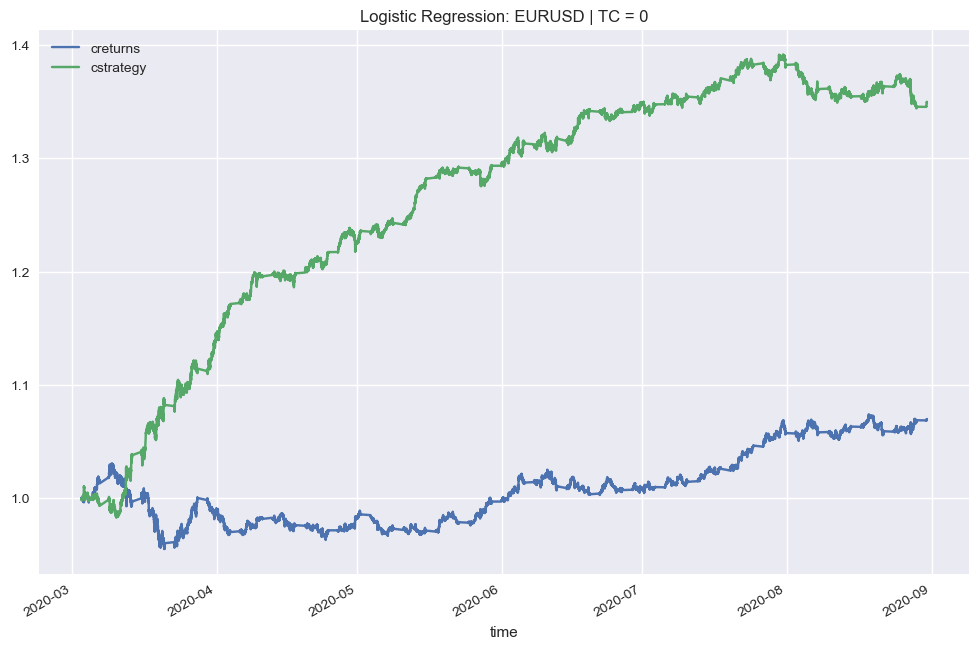

In [90]:
ml.plot_results()

The optimal Number of Lags

In [93]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (1.282642, 0.213307)
2 (1.260498, 0.191192)
3 (1.228282, 0.158693)
4 (1.334458, 0.264725)
5 (1.349309, 0.279355)
6 (1.289346, 0.219243)
7 (1.282049, 0.212042)
8 (1.303185, 0.233188)
9 (1.3462, 0.276217)
10 (1.314879, 0.244588)
11 (1.332232, 0.26185)
12 (1.329267, 0.258822)
13 (1.318944, 0.248466)
14 (1.257105, 0.186458)
15 (1.290008, 0.219256)
16 (1.297938, 0.226613)
17 (1.292853, 0.221413)
18 (1.327898, 0.25692)
19 (1.34056, 0.269711)
20 (1.361615, 0.290704)


In [95]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag16,lag17,lag18,lag19,lag20,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,
2020-03-03 01:35:00+00:00,1.112940,0.000121,-0.294324,0.616454,2.188187,-0.545060,-2.708297,-0.499170,-0.795021,-0.157647,...,-1.044709,-0.680636,-1.339949,0.138111,0.297299,1.0,0.000121,0.0,1.000121,1.000121
2020-03-03 01:40:00+00:00,1.113540,0.000539,0.616422,-0.294331,0.616449,2.188190,-0.545053,-2.708298,-0.499170,-0.795019,...,-0.703607,-1.044724,-0.680631,-1.339970,0.138126,-1.0,-0.000539,2.0,1.000660,0.999582
2020-03-03 01:45:00+00:00,1.113340,-0.000180,2.732985,0.616415,-0.294344,0.616452,2.188211,-0.545050,-2.708298,-0.499168,...,0.456765,-0.703623,-1.044719,-0.680647,-1.339947,-1.0,0.000180,0.0,1.000481,0.999762
2020-03-03 01:50:00+00:00,1.113265,-0.000067,-0.908598,2.732977,0.616410,-0.294341,0.616465,2.188221,-0.545050,-2.708296,...,0.047214,0.456746,-0.703618,-1.044738,-0.680628,-1.0,0.000067,0.0,1.000413,0.999829
2020-03-03 01:55:00+00:00,1.113220,-0.000040,-0.339720,-0.908605,2.732991,0.616414,-0.294332,0.616471,2.188221,-0.545048,...,0.069964,0.047196,0.456753,-0.703634,-1.044716,1.0,-0.000040,2.0,1.000373,0.999789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.466354,1.512281,0.235738,0.001661,-0.764376,0.746443,-0.700538,-0.445135,...,1.278946,-3.658844,1.278332,-0.274946,0.065540,-1.0,0.000080,0.0,1.070174,1.361764
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.402567,-0.466362,1.512284,0.235742,0.001671,-0.764374,0.746443,-0.700536,...,0.278402,1.278924,-3.658844,1.278330,-0.274928,1.0,0.000290,2.0,1.070484,1.362158
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.469557,-0.402574,-0.466376,1.512287,0.235753,0.001675,-0.764374,0.746445,...,-1.105148,0.278384,1.278933,-3.658882,1.278340,-1.0,-0.000231,2.0,1.070731,1.361844


In [97]:
hits = np.sign(ml.results.returns * ml.results.pred).value_counts()
hits

 1.0    18921
-1.0    17745
 0.0      320
Name: count, dtype: int64

In [99]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5115719461417834